
# **Proyecto 1** - Salarios de trabajos de ciencia de datos
## Desarrollado por: Mónica Martínez Ramírez


>Objetivo : se elaborará un análisis sobre los salarios de empleos en ciencias de datos usando lo aprendido en este primer módulo del bootcamp para Ciencias de Datos. Implica el uso de la librería numpy, pandas, seaborn y la exploración de datos y su visualización usando éstas herramientas.

Projecto en Google Collab: https://colab.research.google.com/drive/1GagS2cmgoaNW6NwLfBwubVDMqWmXXN1_?usp=sharing

### Índice


---

1. [Diccionario de datos](https://colab.research.google.com/drive/1GagS2cmgoaNW6NwLfBwubVDMqWmXXN1_#scrollTo=DQN6Riv83iFZ&line=15&uniqifier=1)

2. [Preparación](https://colab.research.google.com/drive/1GagS2cmgoaNW6NwLfBwubVDMqWmXXN1_#scrollTo=lcgNiAoJ4Nd0&line=1&uniqifier=1)
3. [Limpiando Datos](https://colab.research.google.com/drive/1GagS2cmgoaNW6NwLfBwubVDMqWmXXN1_#scrollTo=ToeygKVf8oqu&line=1&uniqifier=1)
4. [Exploracion de los datos por medio de visualizaciones y estadística](https://colab.research.google.com/drive/1GagS2cmgoaNW6NwLfBwubVDMqWmXXN1_#scrollTo=_7XOUJCuHf47&line=1&uniqifier=1)





### 1. Diccionario de datos

| **Nombre de columna** | **Tipo de dato** | **Descripción**                                                                                                                   | **Valores**                                                                                                                      |
|-----------------------|------------------|-----------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------|
| work_year             | int64            | Año en que el salario se pagó.                                                                                                    | 2020, 2021, 2022                                                                                                                 |
| experience_level      | objeto           | Nivel de experiencia.                                                                                                             | MI = Middle/Nivel Medio SE = Senior/Nivel Intermedio EN = Entry/Nivel Junior EX = Expert/Nivel Experto-Ejecutivo                 |
| employment_type       | objeto           | Modo de empleo.                                                                                                                   | FT = Full Time/Tiempo Completo CT = Contractor/Externo PT = Part Time/Medio Tiempo FL = Freelance/Independiente                  |
| job_title             | objeto           | La posición del empleado.                                                                                                         | Ejemplos: 'Data Scientist', 'Machine Learning Scientist','Big Data Engineer'.                                                    |
| salary                | int64            | El monto bruto pagado.                                                                                                            | Numéricos.                                                                                                                       |
| salary_currency       | objeto           | La moneda de pago usando el código de moneda ISO 4217.                                                                            | Ejemplos: USD = Dólar estadounidense. EUR = Euro. GBP = Libra esterlina. INR = Rupias indias. CAD = Dólar canadiense.            |
| salay_in_usd          | int64            | El salario en USD (valor de cambio dividido por el tipo de cambio promedio del año respectivo según http://fxdata.foorilla.com/). | Numéricos.                                                                                                                       |
| employee_residence    | objeto           | La dirección de residencia primaria del empleado durante el año de trabajo según el código de países del ISO 3166.                | Ejemplos: 'DE' 'JP' 'GB' 'HN'.                                                                                                   |
| remote_ratio          | int64            | La cantidad total del trabajo hecho remotamente.                                                                                  | 0 = sin trabajo remoto (menos de 20%). 50 = parcialmente remoto remote. 100 = completamente remoto (más de 80%).                 |
| company_location      | objeto           | El país de la oficina principal del empleador según el código de países del ISO 3166.                                             | Ejemplos: 'DE' 'JP' 'GB' 'HN'.                                                                                                   |
| company_size          | objeto           | La cantidad promedio de personas que trabajaron en la empresa.                                                                    | S = menos de 50 empleados (small/pequeña). M = de 50 a 250 empleados (medium/mediana).  L = más de 250 empleados (large/grande). |




### 2. Preparación



2.1 Se importan las librerías que se usarán para el análisis y manipulación de datos.

In [2]:
# 2.1 Importar Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


2.2 Se importa la base de datos con las que se va a trabajar.

In [3]:
# 2.2 Datos a importar
datos = pd.read_csv('/content/ds_salaries.csv')

2.3 Entendiendo los datos

In [119]:
# La forma de los datos
datos.shape

(565, 11)

In [118]:
# Información sobre el Data Frame
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 465 to 160
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    int64   
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    object  
 3   job_title           565 non-null    object  
 4   salary              565 non-null    int64   
 5   salary_currency     565 non-null    object  
 6   salary_in_usd       565 non-null    int64   
 7   employee_residence  565 non-null    object  
 8   remote_ratio        565 non-null    int64   
 9   company_location    565 non-null    object  
 10  company_size        565 non-null    category
dtypes: category(2), int64(4), object(5)
memory usage: 45.6+ KB


In [6]:
# Obtener los primeros 5 registros.
datos.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# Obtener los registros y columns de dataframe
print('Nombres de columnas:\n ', [datos.columns])
print('\n')
print('Cantidad de registros en las filas: ', datos.index)

Nombres de columnas:
  [Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')]


Cantidad de registros en las filas:  RangeIndex(start=0, stop=607, step=1)


In [8]:
# Obtener el conteo de registros del Dataframe

datos.count()

,0
Unnamed: 0,607
work_year,607
experience_level,607
employment_type,607
job_title,607
salary,607
salary_currency,607
salary_in_usd,607
employee_residence,607
remote_ratio,607


In [9]:
# Obtenemos la cantidad de valores únicos que contiene cada columna.
# Así, podemos ver qué columnas son categóricas (pocos valores) y contínuass (más valores).
datos.nunique()

,0
Unnamed: 0,607
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3


In [10]:
# Con la información previa, creamos una lista de los valores categóricos y contínuos.
categoricos = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
continuos = ['salary_in_usd', 'salary']

print('Columnas categóricas: ', categoricos)
print('\n')
print('Columnas continuas: ', continuos)

Columnas categóricas:  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


Columnas continuas:  ['salary_in_usd', 'salary']


In [11]:
# Ahora para ver los valores categóricos de cada columna, iteramos el siguiente ciclo:

for i in categoricos:
  print(f'The values for column \'{i}\' are:')
  print(datos[i].unique())
  print('\n')

The values for column 'work_year' are:
[2020 2021 2022]


The values for column 'experience_level' are:
['MI' 'SE' 'EN' 'EX']


The values for column 'employment_type' are:
['FT' 'CT' 'PT' 'FL']


The values for column 'job_title' are:
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Dat

### 3. Limpiando los datos

3.1 Se valida si existen datos nulos en el DataFrame para removerlos si hay necesidad.

In [12]:
# Verificar si existen nulos en los datos.
datos.isnull().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [13]:
# Eliminamos columna que no aporta al análisis "Unnamed:0"
datos.drop('Unnamed: 0', axis = 1, inplace =True)

In [14]:
# Se valida si hay datos "N/A"
# En este caso vemos que no existen.
datos.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [15]:
# Por último, se examina si los datos tiene duplicados.
# En este caso vemos que existen los siguientes:

datos.loc[(datos.duplicated() == True)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [16]:
#Para eliminar estos duplicados:
datos.drop_duplicates(datos.loc[(datos.duplicated() == True)], inplace = True)


### 4. Exploracion de los datos por medio de visualizaciones y estadística



4.1 Empezamos con un análisis descriptivo.

In [17]:
# Genera un análisis descriptivo estadístico para valores int64 (contínuos).
datos.describe(exclude='object').round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,565.00,565.00,565.00,565.00
mean,2021.36,338115.99,110610.34,69.91
std,0.70,1599878.79,72280.70,40.90
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,67000.00,60757.00,50.00
50%,2021.00,110925.00,100000.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


In [18]:
# Genera un análisis descriptivo estadístico para los demás valores (categóricos).
datos.describe(exclude='int64')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,565,565,565,565,565,565,565
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,243,546,130,359,295,318,290


Sobre los valores contínuos, podemos notar que el promedio del salario en USD, es de \$100,000, mientras el mínimo es de $60,000. Éste es relativamente alto.
Además, el promedio de los trabajos son remotos, los cuales brindan una comodidad más alta.

Sobre los valores categóricos, es evidente que el lugar más frequente es Estados Unidos y su pago es en dólares. Además, el rol de trabajo más notable es el de "Data Scientist" con 130 repeticiones. Por último, casi todos de los empleos son tiempo completo.

4.2 Visualizamos con gráficos

4.2.1 Para empezar, estaremos viendo las relaciones entre el nivel de experiencia con el salario en USD, así como el tamaño de la compañía.

In [19]:
#Como usaremos el nivel de experiencia como X, ya que es la variable principal que queremos ver, tendremos que ordenarla primero dentro del DataFrame.
level_order = ['EN', 'MI', 'SE', 'EX']

datos['experience_level'] = pd.Categorical(datos['experience_level'], categories=level_order, ordered=True)
datos = datos.sort_values('experience_level')

#También ordenaremos el tamaño de la compañía.
size_order = ['S', 'M', 'L']
datos['company_size'] = pd.Categorical(datos['company_size'], categories=size_order, ordered=True)


[Text(0.5, 0, 'Nivel de experiencia'), Text(0, 0.5, 'Salario en USD')]

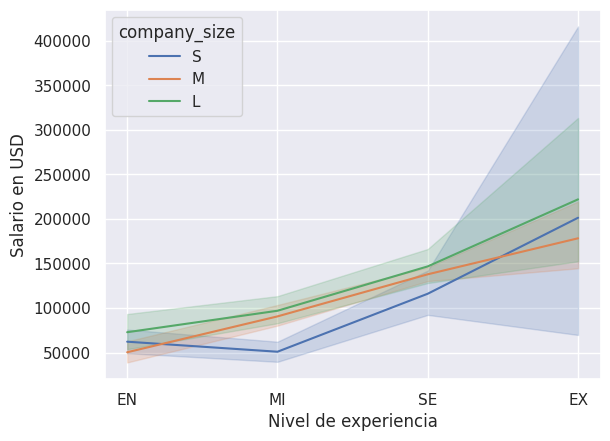

In [120]:
#Ya ordenados, creamos un gráfico de líneas sencillo con Seaborn.
#Primero cargamos el estilo que usaremos a lo largo del análisis.
sns.set_theme(style='darkgrid')
sns.lineplot(data=datos, x='experience_level', y='salary_in_usd', hue='company_size', sort=False, legend='brief').set(xlabel='Nivel de experiencia', ylabel='Salario en USD')



Con esta gráfica podemos notar lo siguiente:
+    En trabajos EN, el salario es más alto en las empresas grandes.
*   En las empresas pequeñas, el salario baja de EN para MID, lo cual puede parecer incosistente, pues uno pensaría que con mayor experiencia el salario aumenta.
+ Para nivel EX, el salario de las empresas S sobrepasa el de una empresa M.



4.2.2 Ahora estaremos haciendo una matriz de correlación y subsecuentemente graficándola usando un Heatmap.


In [21]:
# Usando Pandas, se crea una matriz de correlación usando el método Pearson.
# Usaremos las columnas de valores numéricos.
corr = datos.select_dtypes(include='int64').corr(method='pearson')
print(corr)

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.082597       0.159326      0.058879
salary         -0.082597  1.000000      -0.083728     -0.012279
salary_in_usd   0.159326 -0.083728       1.000000      0.122849
remote_ratio    0.058879 -0.012279       0.122849      1.000000


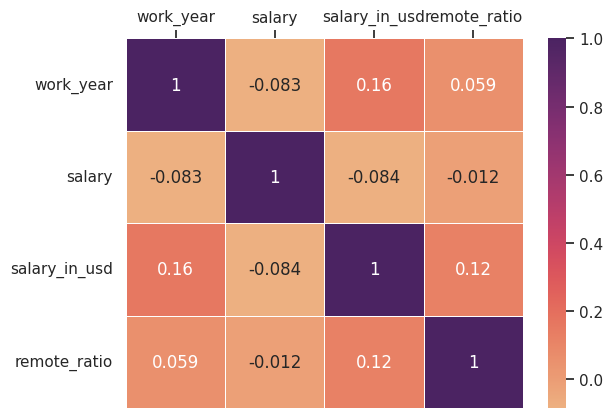

In [22]:
ax = sns.heatmap(corr,cmap='flare',annot=True,linewidths=0.5)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

Para revisar una correlación de Pearson, se nota qué números están más cerca del 1.
La correlación más cercana que tenemos es la del año de trabajo y el salario en USD, aunque no es una muy grande.

4.2.3 Realizamos una gráfica de barras de las ubicaciones de las compañías.

[Text(0.5, 0, 'Cantidad'), Text(0, 0.5, 'Países')]

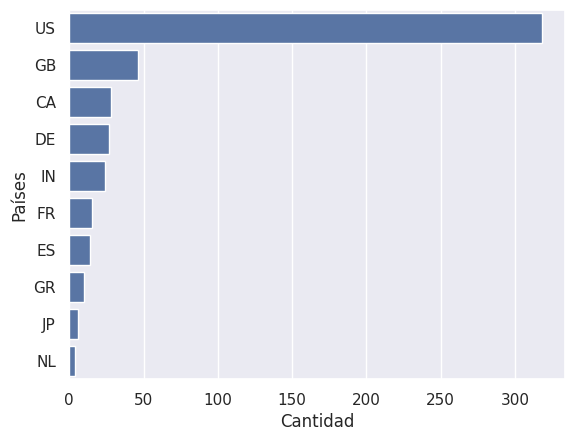

In [116]:
#Ya que la cantidad de países es 50 y es demasiado para una gráfica, agarraremos los top 10 con mayor frequencia.
#Creamos un nuevo DataFrame con la frequencia de los 10 países más mencionados en los datos.
df_top_10 = pd.DataFrame(datos['company_location'].value_counts().head(10))
#Nombramos la columna
df_top_10.columns = ['Frecuencia']
#Graficamos
ax1 = sns.barplot(data=df_top_10, y='company_location', x='Frecuencia')
ax1.set(xlabel="Cantidad", ylabel="Países")

Podemos notar que el país con mayor cantidad de empleados fue Estados Unidos por un margen bastante grande.

4.2.4 Realizamos un histograma.

[Text(0.5, 0, 'Año de trabajo'), Text(0, 0.5, 'Frecuencia')]

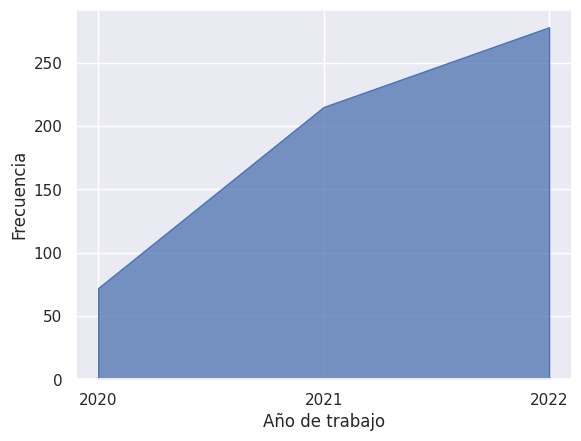

In [117]:
#Graficamos la frequencia de los años de trabajo.
sns.histplot(datos, x=datos['work_year'].astype(str).sort_values(), discrete=True,stat='count', element='poly').set(xlabel='Año de trabajo', ylabel='Frecuencia')


Con esto podemos notar que desde el 2020, la cantidad de empleos ha estado aumentando.

### 5. Conclusiones



Tenemos una base de datos a lo largo del 2020, 2021 y 2022 que contiene una serie de datos útiles sobre los empleos, tales como el nombre del rol, el nivel de experiencia, el tipo de empleo y el salario en dólares.

El salario promedio en dólares fue de $110,610.34.

El promedio de empleos tiene la modalidad híbrida al 69%.

La mayoría del nivel de experiencia es del Senior.

El tipo de empleo más común es de tiempo completo.

Tanto la residencia del empleado como la ubicación de la compañía más frecuente fue Estados Unidos.

El tamaño de compañía más común fue el tamaño mediano.

El salario más bajo se encuentra en las empresas medianas como EN.

Como MI el salario baja en las empresas pequeñas.

Para EX, el salario es más alto en empresas pequeñas que en medianas.

No existe una correlación muy fuerte entre los elementos de la base de datos.

La cantidad de empleos va en aumento año con año entre 202 y 2022.


### Referencias



---
#
https://pandas.pydata.org/docs/index.html

https://seaborn.pydata.org/generated/seaborn.lineplot.html

https://docs.python.org/3.12/search.html?q=%5Cn
